[[ 0.03455284]
 [-0.12293182]
 [ 2.37638472]
 [ 2.40056642]
 [-5.80855424]
 [-1.99936879]
 [ 3.06866797]
 [ 0.2707302 ]]


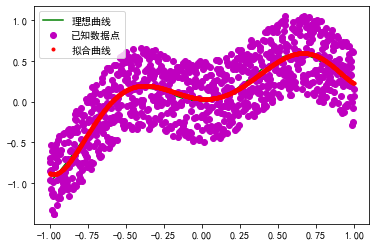

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1,1,0.002)
y = ((x*x-1)**3+1)*(np.cos(x*2)+0.6*np.sin(x*1.3))

y1 = y+(np.random.rand(len(x))-0.5)

##################################
### 核心程序
#使用函数y=ax^3+bx^2+cx+d对离散点进行拟合，最高次方需要便于修改，所以不能全部列举，需要使用循环
#A矩阵
m=[]
for i in range(8):#这里选的最高次为x^7的多项式
    a=x**(i)
    m.append(a)
A=np.array(m).T
b=y1.reshape(y1.shape[0],1)

##################################

def projection(A,b):
    AA = A.T.dot(A)#A乘以A转置
    w=np.linalg.inv(AA).dot(A.T).dot(b)
    print(w)#w=[[-0.03027851][ 0.1995869 ] [ 2.43887827] [ 1.28426472][-5.60888682] [-0.98754851][ 2.78427031]]
    return A.dot(w)

yw = projection(A,b)
yw.shape = (yw.shape[0],)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.plot(x,y,color='g',linestyle='-',marker='',label=u"理想曲线")
plt.plot(x,y1,color='m',linestyle='',marker='o',label=u"已知数据点")
plt.plot(x,yw,color='r',linestyle='',marker='.',label=u"拟合曲线")
plt.legend(loc='upper left')
plt.show()